<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [5]:
train = pd.read_csv(r"train.csv")
test = pd.read_csv(r"test.csv")
train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [6]:
X = train.drop('Churn', axis=1)
y = train.Churn

In [7]:
X.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
dtype: int64

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [9]:
X.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen
count,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409
std,24.550326,30.176464,0.366092
min,0.000000,18.250000,0.000000
25%,9.000000,35.462500,0.000000
50%,29.000000,70.400000,0.000000
75%,55.000000,90.050000,0.000000
max,72.000000,118.750000,1.000000


In [10]:
X.applymap(lambda x: x == ' ').any()

C:\Users\damir\AppData\Local\Temp\ipykernel_6852\802832588.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X.applymap(lambda x: x == ' ').any()


ClientPeriod                False
MonthlySpending             False
TotalSpent                   True
Sex                         False
IsSeniorCitizen             False
HasPartner                  False
HasChild                    False
HasPhoneService             False
HasMultiplePhoneNumbers     False
HasInternetService          False
HasOnlineSecurityService    False
HasOnlineBackup             False
HasDeviceProtection         False
HasTechSupportAccess        False
HasOnlineTV                 False
HasMovieSubscription        False
HasContractPhone            False
IsBillingPaperless          False
PaymentMethod               False
dtype: bool

In [11]:
X[train.TotalSpent == ' ']

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic)
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic)
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic)


In [12]:
X.TotalSpent.replace(' ', 1, inplace=True)
test.TotalSpent.replace(' ', 1, inplace=True)

C:\Users\damir\AppData\Local\Temp\ipykernel_6852\2268358452.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.TotalSpent.replace(' ', 1, inplace=True)
C:\Users\damir\AppData\Local\Temp\ipykernel_6852\2268358452.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [13]:
X.TotalSpent = X.TotalSpent.astype(float)
test.TotalSpent = test.TotalSpent.astype(float)

In [14]:
bin_cols = ['Sex','IsSeniorCitizen', 'HasPartner', 'HasChild', 'HasPhoneService', 'IsBillingPaperless']

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
X[bin_cols] = X[bin_cols].apply(LabelEncoder().fit_transform)
test[bin_cols] = test[bin_cols].apply(LabelEncoder().fit_transform)

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   int32  
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   int32  
 6   HasChild                  5282 non-null   int32  
 7   HasPhoneService           5282 non-null   int32  
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
numeric_cols = X.select_dtypes(include='number').columns.tolist()
categorial_cols = X.select_dtypes(exclude='number').columns.tolist()

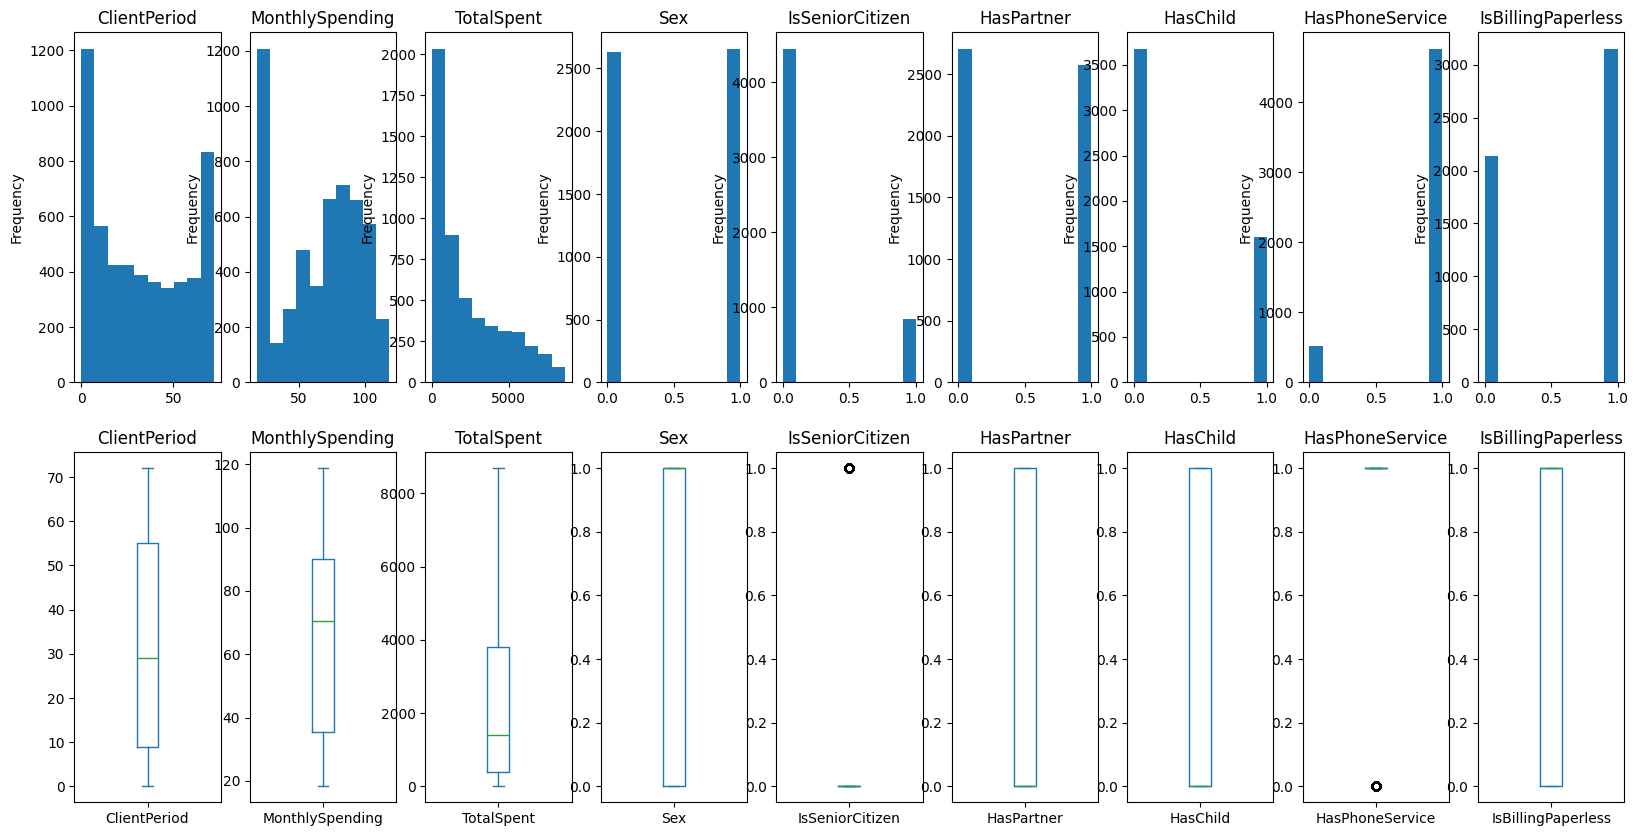

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=len(numeric_cols), figsize=(20, 10))
for i, col in enumerate(numeric_cols):
    X[col].plot(kind='hist', ax=axes[0][i])
    X[col].plot(kind='box', ax=axes[1][i])
    axes[0][i].set_title(col)
    axes[1][i].set_title(col)

plt.show()

<Axes: >

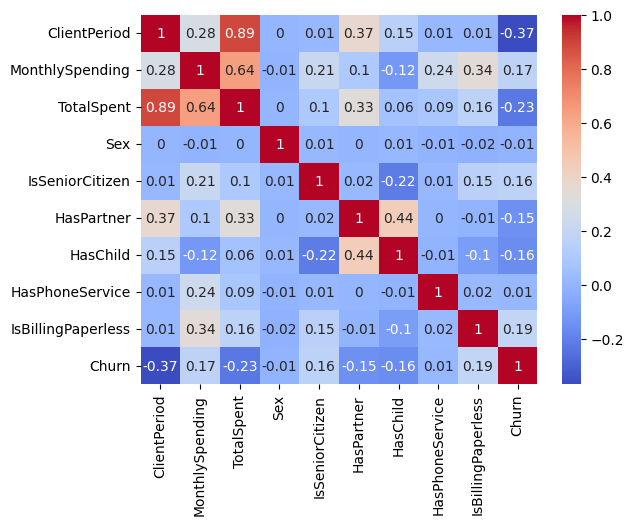

In [21]:
sns.heatmap(pd.concat([X[numeric_cols], y], axis=1).corr(method='spearman').round(2), 
            annot=True,
            cmap='coolwarm')

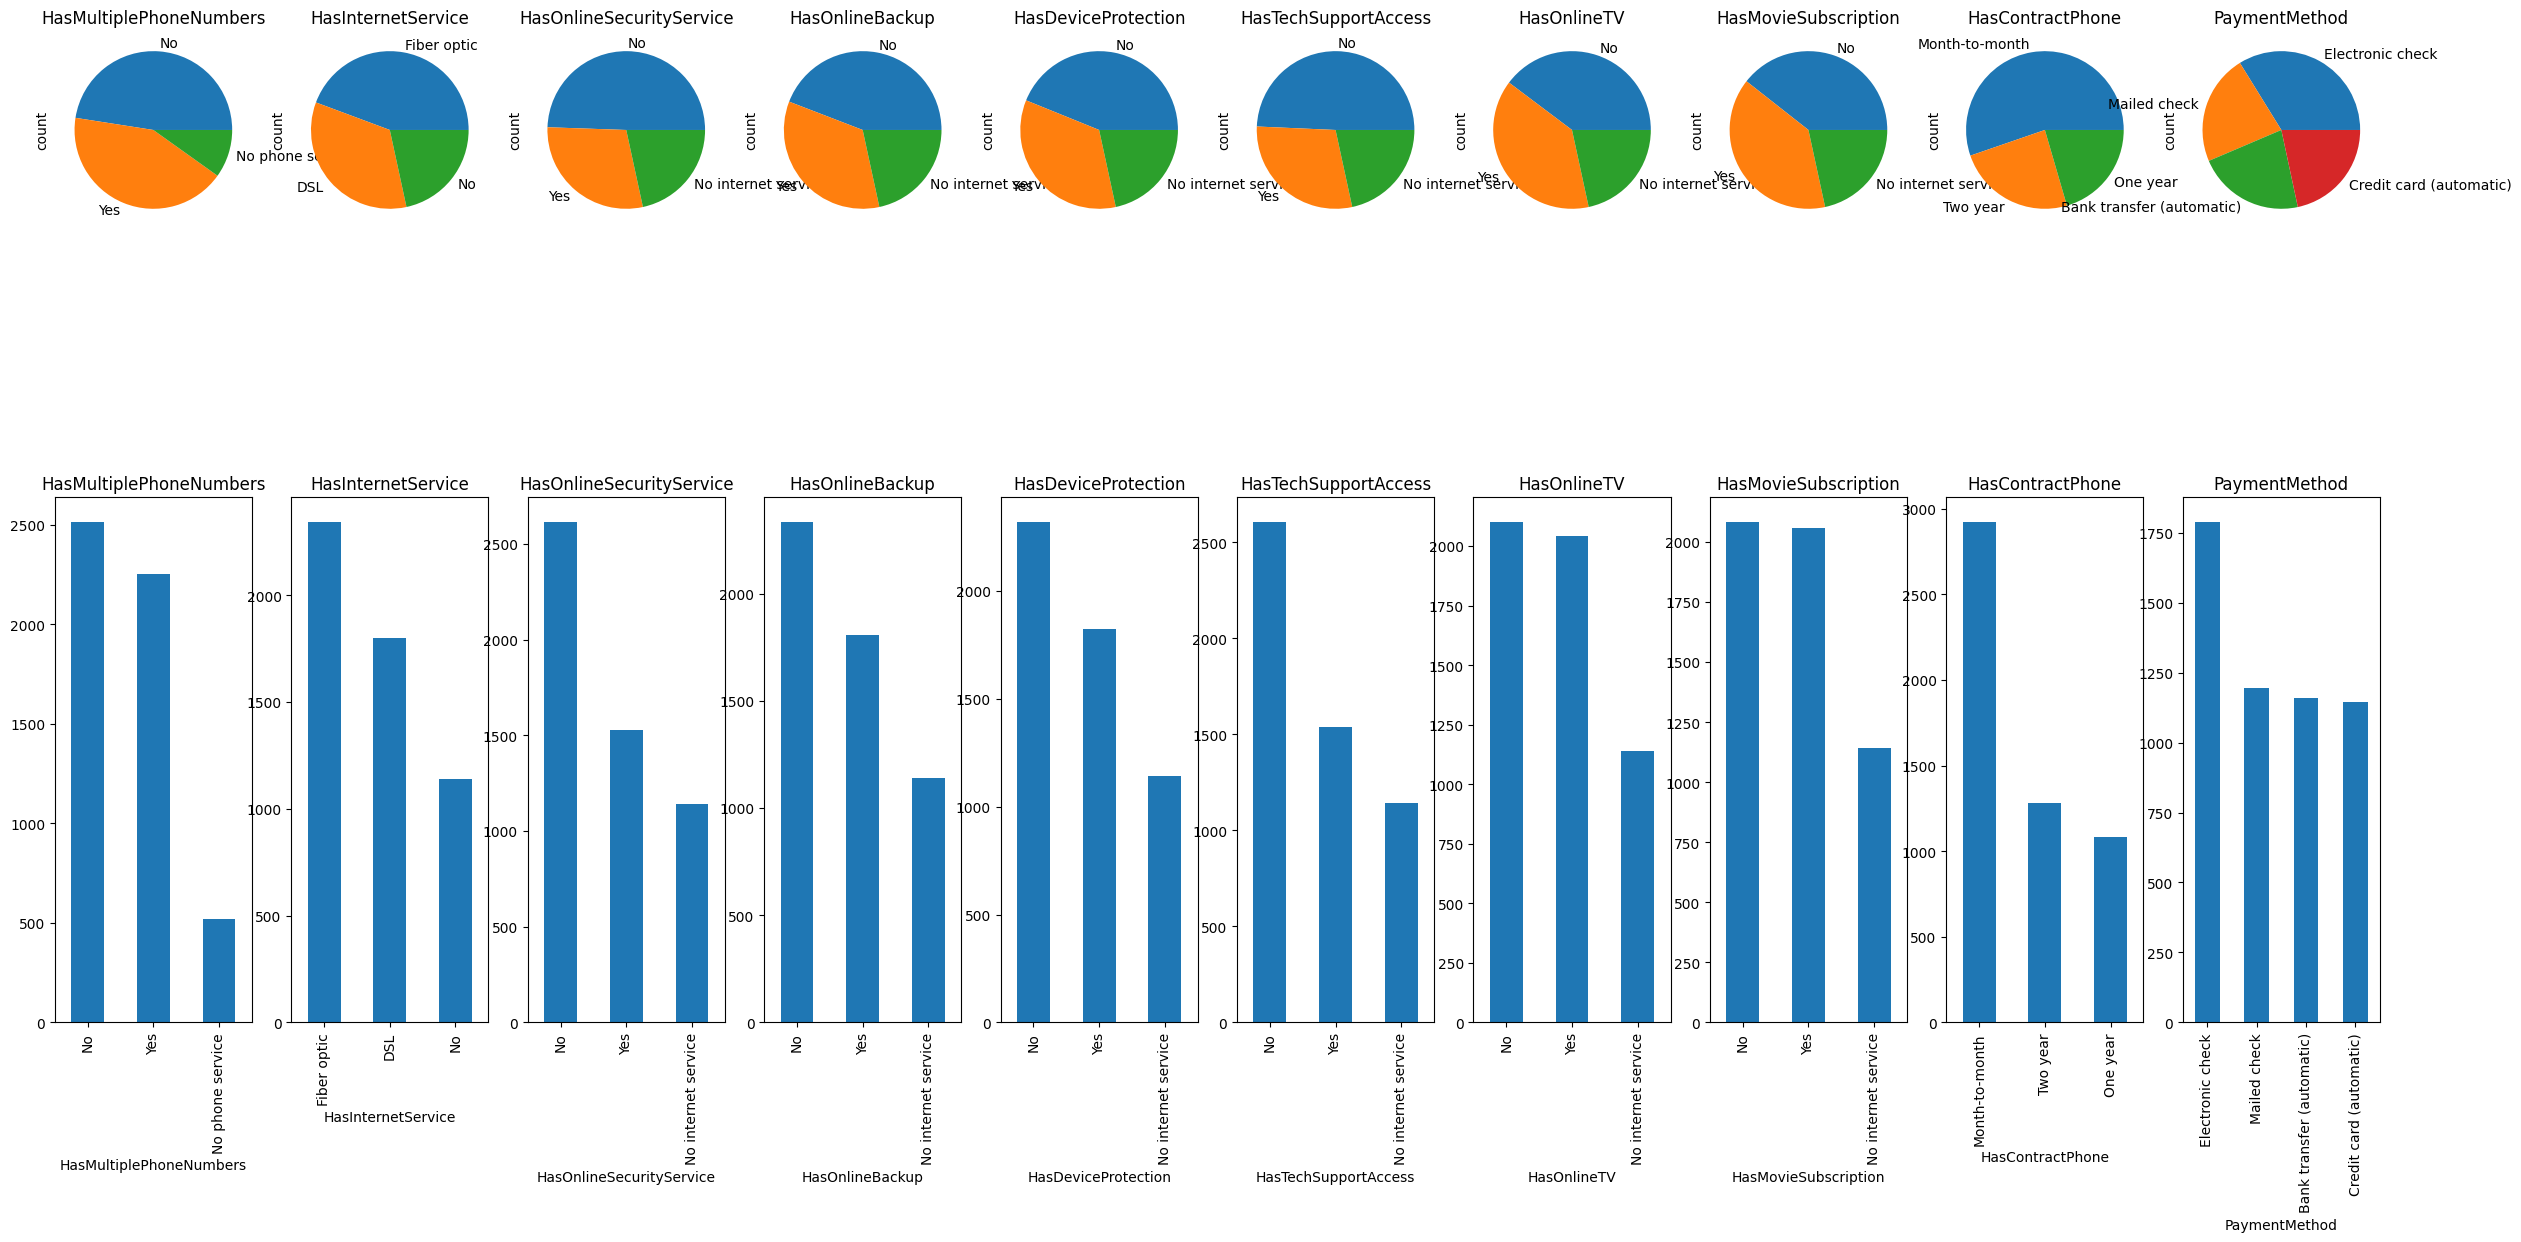

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=len(categorial_cols), figsize=(30, 15))

for i, col in enumerate(categorial_cols):
    X[col].value_counts().plot(kind='pie', ax=axes[0][i])
    X[col].value_counts().plot(kind='bar', ax=axes[1][i])
    axes[0][i].set_title(col)
    axes[1][i].set_title(col)

plt.show()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [23]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [24]:
# random_under = RandomUnderSampler(random_state=42)
random_over = RandomOverSampler(random_state=42)

In [25]:
X, y = random_over.fit_resample(X, y)
y.value_counts()

Churn
0    3898
1    3898
Name: count, dtype: int64

In [26]:
numeric_cols = X.select_dtypes(include='number').columns.tolist()
categorial_cols = X.select_dtypes(exclude='number').columns.tolist()

In [27]:
X_train = pd.get_dummies(X[categorial_cols], drop_first=True, dtype=int)
X_test = pd.get_dummies(test[categorial_cols], drop_first=True, dtype=int)

In [28]:
X_train = pd.concat([X[numeric_cols], X_train], axis=1)
X_test = pd.concat([test[numeric_cols], X_test], axis=1)

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y,  train_size=0.8, random_state=42)

In [30]:
ss = StandardScaler()

In [31]:
X_train[numeric_cols] = ss.fit_transform(X_train[numeric_cols])
X_val[numeric_cols] = ss.transform(X_val[numeric_cols])
X_test[numeric_cols] = ss.transform(X_test[numeric_cols])

In [32]:
Cs = np.logspace(-3, 3, 30)

In [33]:
lgcv = LogisticRegressionCV(Cs=Cs, random_state=42, scoring='roc_auc')

In [34]:
lgcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=array([1.00000000e-03, 1.61026203e-03, 2.59294380e-03, 4.17531894e-03,
       6.72335754e-03, 1.08263673e-02, 1.74332882e-02, 2.80721620e-02,
       4.52035366e-02, 7.27895384e-02, 1.17210230e-01, 1.88739182e-01,
       3.03919538e-01, 4.89390092e-01, 7.88046282e-01, 1.26896100e+00,
       2.04335972e+00, 3.29034456e+00, 5.29831691e+00, 8.53167852e+00,
       1.37382380e+01, 2.21221629e+01, 3.56224789e+01, 5.73615251e+01,
       9.23670857e+01, 1.48735211e+02, 2.39502662e+02, 3.85662042e+02,
       6.21016942e+02, 1.00000000e+03]),
                     random_state=42, scoring='roc_auc')

In [35]:
lgcv.C_[0]

57.361525104486816

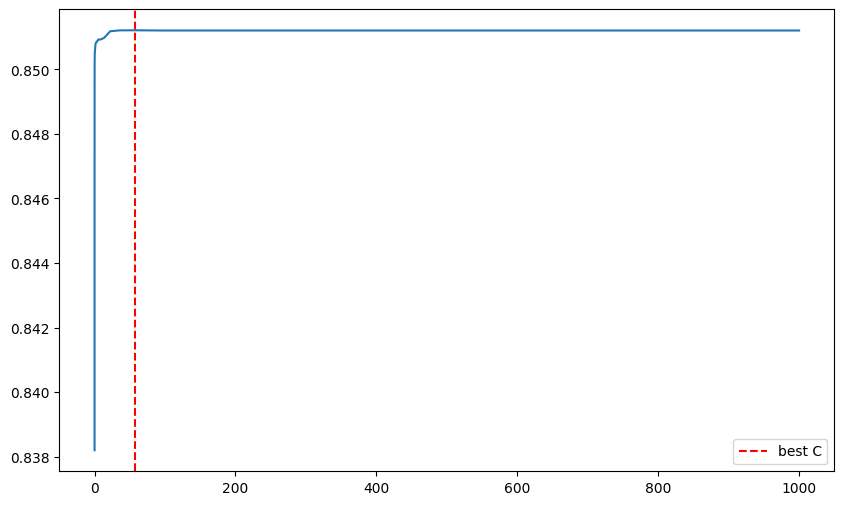

In [36]:
plt.figure(figsize=(10, 6))
sns.lineplot(y=lgcv.scores_[1].mean(axis=0), x=lgcv.Cs_)
plt.axvline(lgcv.C_, ls='--', color='r', label='best C')
plt.legend()

In [37]:
y_pred_lgcv_val = lgcv.predict_proba(X_val)[:, 1]
y_pred_lgcv_train = lgcv.predict_proba(X_train)[:, 1]

In [38]:
roc1_val = roc_auc_score(y_val, y_pred_lgcv_val)
roc1_train = roc_auc_score(y_train, y_pred_lgcv_train)
roc1_val, roc1_train

(0.8284333388130857, 0.8542418583179452)

In [39]:
from sklearn.metrics import roc_curve

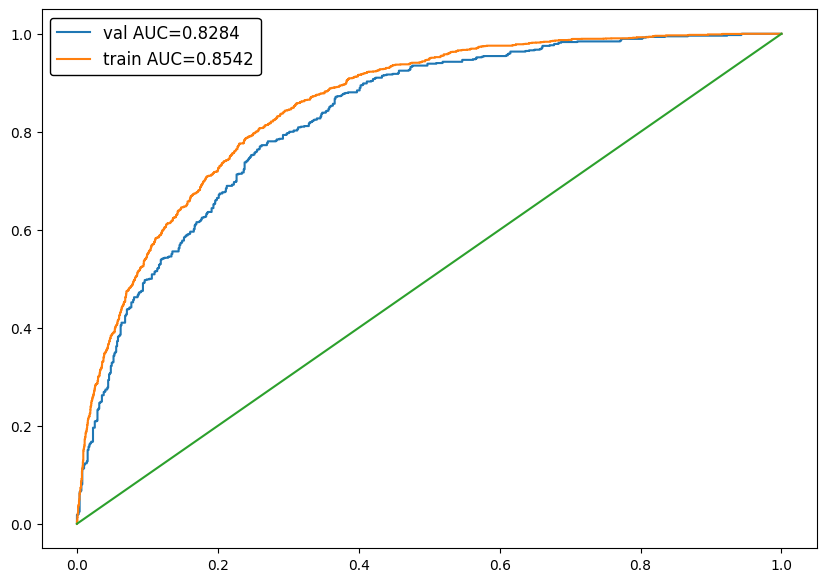

In [40]:
plt.figure(figsize=(10, 7))
plt.plot(*roc_curve(y_val, y_pred_lgcv_val)[:2], label='val AUC={:.4f}'.format(roc1_val))
plt.plot(*roc_curve(y_train, y_pred_lgcv_train)[:2], label='train AUC={:.4f}'.format(roc1_train))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## roc_auc_score = 0.8624019627034152
## C = 239.5026619987486

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [41]:
from catboost import CatBoostClassifier, Pool

In [42]:
catboost = CatBoostClassifier(**{'grow_policy': 'Lossguide','eval_metric': 'AUC:hints=skip_train~false', 
                                        'loss_function': 'Logloss', 'auto_class_weights': 'Balanced', 
                                        'logging_level': 'Silent'})

In [43]:
pool = Pool(X, label=y, cat_features=categorial_cols)

In [44]:
parameters = {'n_estimators': [298], 
          'max_depth': [3], 
          'subsample': np.linspace(0.55, 0.6, 10), 
          'l2_leaf_reg': np.linspace(3, 3.5, 5), 
          'random_strength': np.linspace(1.1, 1.2, 10), 
          'eta': np.linspace(0.09, 0.1, 10), 
          'min_data_in_leaf': [5], 
          'random_state': [42]}

In [45]:
# catboost.grid_search(parameters, X=pool)

In [46]:
best_catboost = CatBoostClassifier(n_estimators=400, 
                                   max_depth=3,
                                   random_state=42,
                                   min_data_in_leaf=5,
                                   l2_leaf_reg=3.3,
                                   subsample=0.58, 
                                   eta=0.095,
                                   random_strength=1.14)

In [47]:
best_catboost.fit(pool)

0:	learn: 0.6625895	total: 162ms	remaining: 1m 4s
1:	learn: 0.6383587	total: 186ms	remaining: 37s
2:	learn: 0.6156164	total: 209ms	remaining: 27.7s
3:	learn: 0.5965404	total: 234ms	remaining: 23.1s
4:	learn: 0.5856136	total: 261ms	remaining: 20.7s
5:	learn: 0.5727197	total: 286ms	remaining: 18.8s
6:	learn: 0.5632291	total: 314ms	remaining: 17.7s
7:	learn: 0.5541487	total: 339ms	remaining: 16.6s
8:	learn: 0.5444356	total: 363ms	remaining: 15.8s
9:	learn: 0.5359237	total: 385ms	remaining: 15s
10:	learn: 0.5298121	total: 414ms	remaining: 14.6s
11:	learn: 0.5233980	total: 487ms	remaining: 15.7s
12:	learn: 0.5183310	total: 531ms	remaining: 15.8s
13:	learn: 0.5139770	total: 559ms	remaining: 15.4s
14:	learn: 0.5096605	total: 583ms	remaining: 15s
15:	learn: 0.5068322	total: 608ms	remaining: 14.6s
16:	learn: 0.5040934	total: 632ms	remaining: 14.2s
17:	learn: 0.5009011	total: 656ms	remaining: 13.9s
18:	learn: 0.4985655	total: 676ms	remaining: 13.6s
19:	learn: 0.4963977	total: 701ms	remaining: 13

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## roc_auc_score = 0.8533093106680025
## n_estimators=400, 
## max_depth=3,
## random_state=42,
## min_data_in_leaf=5,
## l2_leaf_reg=3.3,
## subsample=0.58
##  eta=0.095,
## random_strength=1.14

# Предсказания

In [48]:
submission = pd.read_csv(r"submission.csv")
submission['Churn'] = best_catboost.predict_proba(test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.